# Project 5

## Source codes (30%)

In [85]:
import argparse
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage import color
from mpl_toolkits.mplot3d import Axes3D
import cv2
from google.colab.patches import cv2_imshow


def edgesMarrHildreth(img, sigma, threshold_percent):
  size = int(2*(np.ceil(3*sigma))+1)
  x, y = np.meshgrid(np.arange(-size/2+1, size/2+1), np.arange(-size/2+1, size/2+1))
  normal = 1 / (2.0 * np.pi * sigma**2)

  kernel = ((x**2 + y**2 - (2.0*sigma**2)) / sigma**4) * \
      np.exp(-(x**2+y**2) / (2.0*sigma**2)) / normal  # LoG filter

  kern_size = kernel.shape[0]
  log = np.zeros_like(img, dtype=float)


  # applying filter
  for i in range(img.shape[0]-(kern_size-1)):
    for j in range(img.shape[1]-(kern_size-1)):
        window = img[i:i+kern_size, j:j+kern_size] * kernel
        log[i, j] = np.sum(window)

  log = log.astype(np.int64, copy=False)




  # threshold
  tmp_list=[]
  for i in range(700):
    for j in range(1100):
        tmp_list.append(log[i, j])

  tmp_list.sort()
  threshold = tmp_list[700*1100-1]*threshold_percent




  zero_crossing = np.zeros_like(log)#依據給定陣列(a)的形狀和型別返回一個新的元素全部為0的陣列。
  # computing zero crossing
  search_list = [ [[0,-1],[0,1]] , [[-1,0],[1,0]] , [[-1,-1],[1,1]] , [[-1,1],[1,-1]] ]
  for i in range(log.shape[0]-(kern_size-1)):
    for j in range(log.shape[1]-(kern_size-1)):

      #對向近鄰像素中，至少兩個 "符號不同，且差量絕對值超過門檻"
      tmp=0
      for item in search_list:
        (x0,y0) = (item[0][0]+i , item[0][1]+j)
        (x1,y1) = (item[1][0]+i , item[1][1]+j)
        if (log[x0,y0] * log[x1,y1] <= 0) and (abs(log[x0,y0]-log[x1,y1])>=threshold):
          tmp = tmp+1

      if tmp>=2:
        zero_crossing[i][j] = 255



  return log, zero_crossing, threshold

## Figures of the LoG image (10%), binary images by zero-crossings with threshold of 0 and 4% of max(LoG) (30%)

LoG


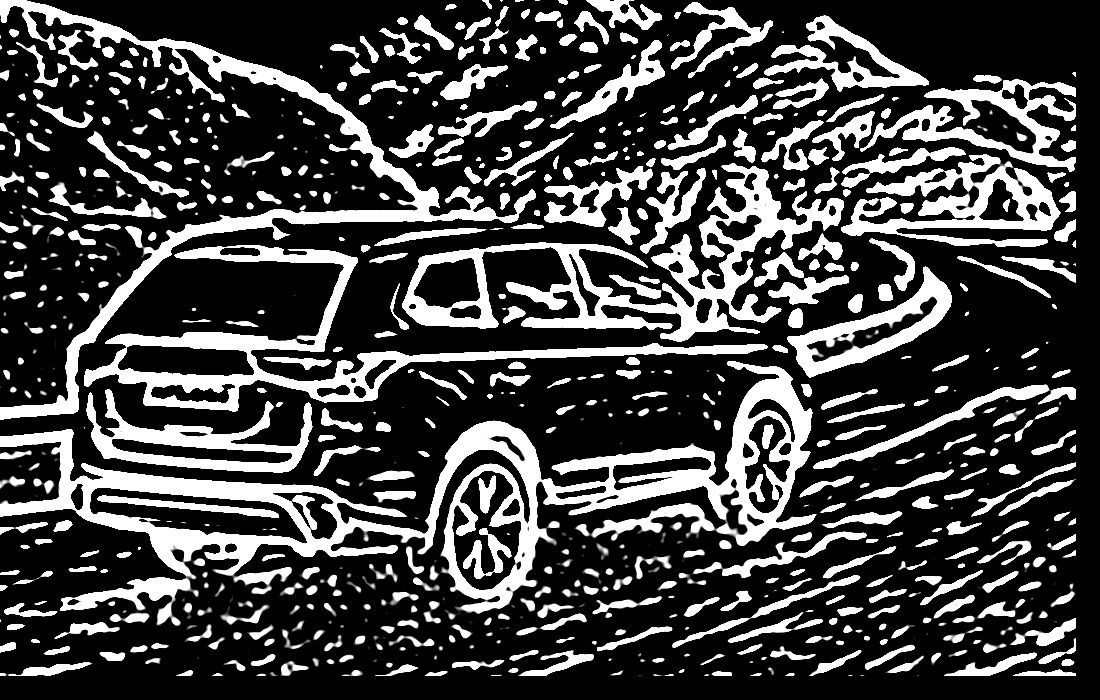

zero_crossing (0%)
threshold= 0


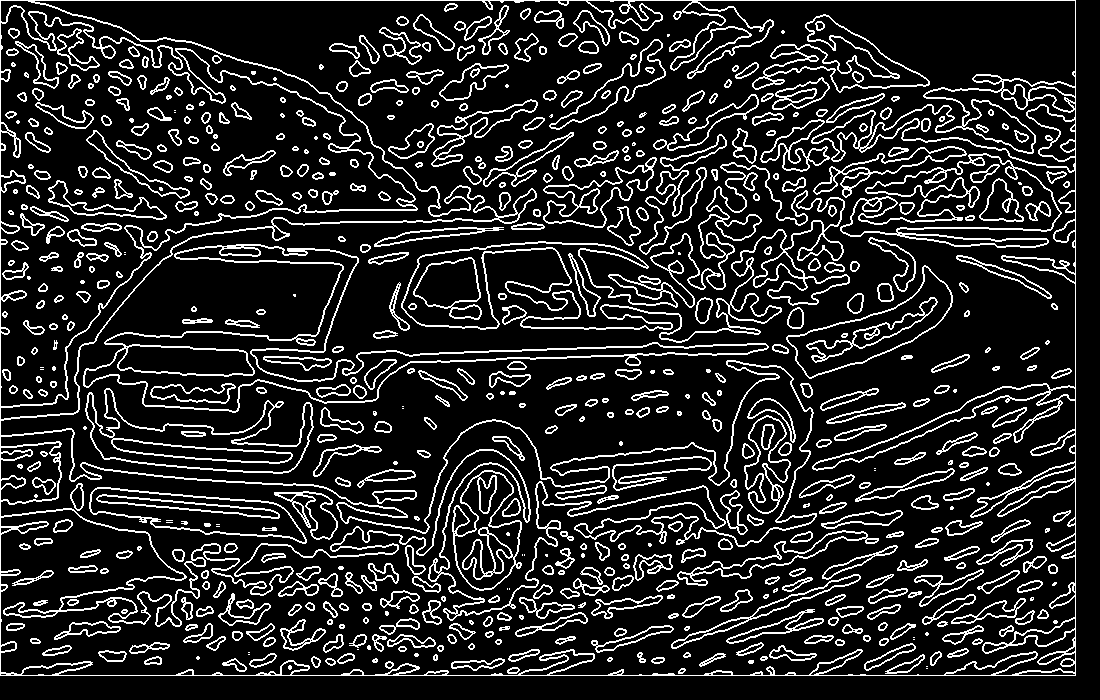

zero_crossing (4%)
threshold= 2528.7200000000003


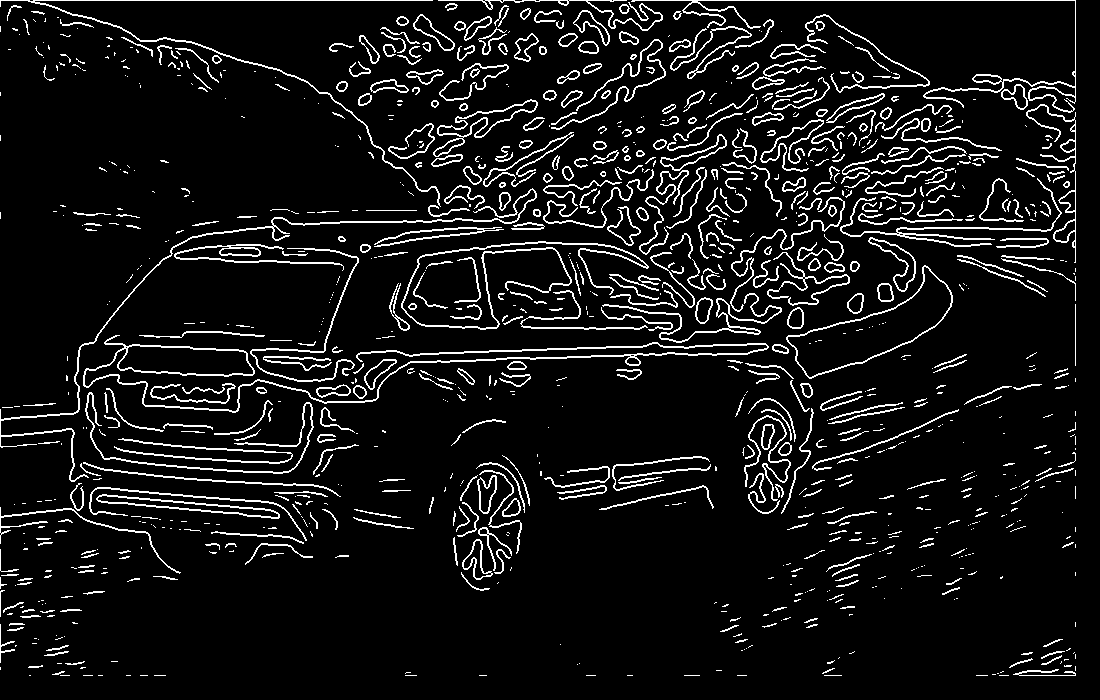

In [86]:
image = cv2.imread('/content/Car On Mountain Road.tif')
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img1 = img.copy()
log0, zero_crossing_0, threshold_0 = edgesMarrHildreth(img, 4, 0)
log1, zero_crossing_1, threshold_1 = edgesMarrHildreth(img1, 4, 0.04)

print('LoG')
cv2_imshow(log0)
print('zero_crossing (0%)')
print('threshold=',threshold_0)
cv2_imshow(zero_crossing_0)
print('zero_crossing (4%)')
print('threshold=',threshold_1)
cv2_imshow(zero_crossing_1)

## Figure of Hough parameter space, refer to Fig 10.31(c) (15%)

Hough space


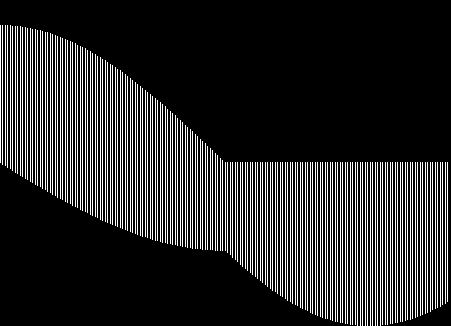

In [134]:
img = cv2.imread('/content/Car On Mountain Road.tif')
img_shape = img.shape
x_max = img_shape[0]
y_max = img_shape[1]

D= int( (x_max**2 + y_max**2)**0.5 )
y_scale = 0.125
x_scale = 2.5


hough_space = np.zeros( ( int(2*D*y_scale)+1 ,int(180*x_scale)+1 ) )
for x in range(x_max):
  for y in range(y_max):
    for theta in range(-90,90):
      rho = x * math.cos(theta*math.pi/180) + y * math.sin(theta*math.pi/180)
      index_rho = int( ( rho+D )*y_scale )
      index_theta = int( (90+theta)*x_scale )
      hough_space[index_rho][index_theta] = 255

print('Hough space')
cv2_imshow(hough_space)

## Figures of linked edges alone and overlapped on the original image, refer to Fig 10.31(d),(e) (15%)

linked edges alone


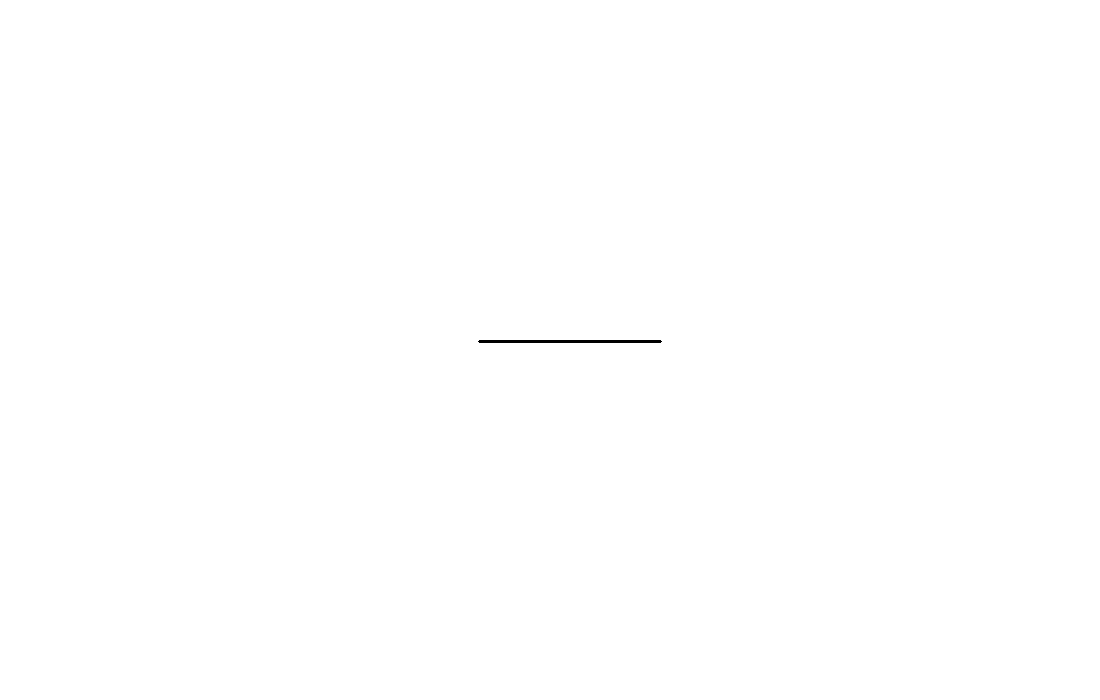

overlapped on the original image


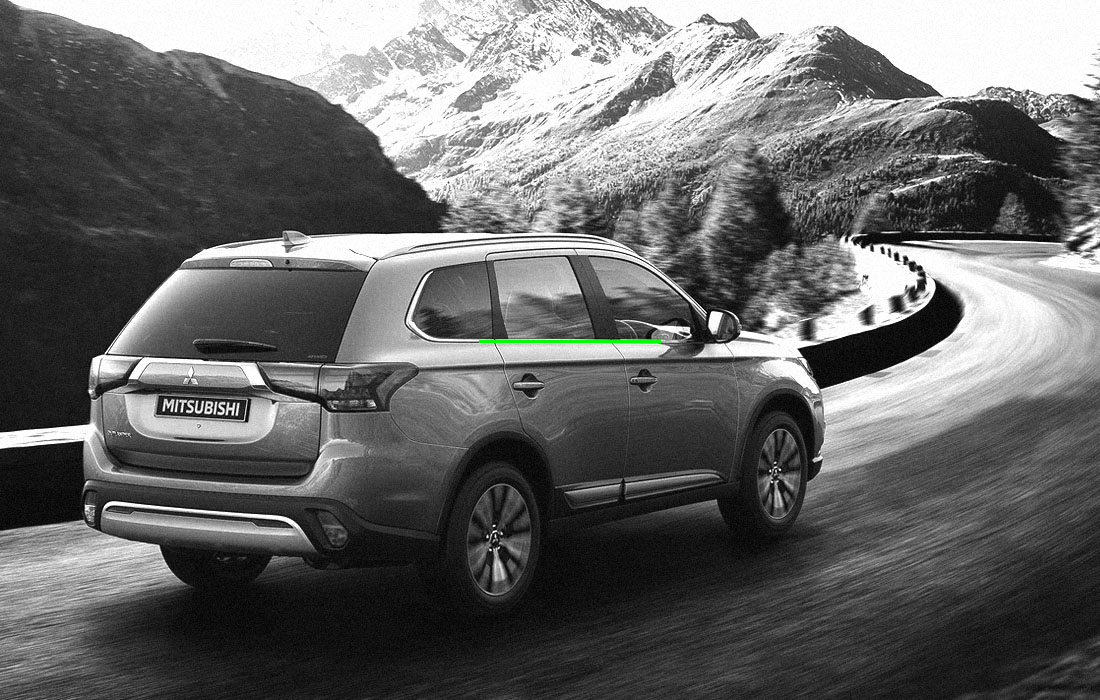

In [178]:
img = cv2.imread('/content/Car On Mountain Road.tif')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

# HoughLinesP(image, rho, theta, threshold, lines=None, minLineLength=None, maxLineGap=None)
minLineLength = 1
maxLineGap = 100
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)

img_shape = img.shape
blank = np.zeros(( img.shape[0],img.shape[1] ))
for x in range(img.shape[0]):
  for y in range(img.shape[1]):
    blank[x][y] = 255

for x1,y1,x2,y2 in lines[0]:
  cv2.line(blank,(x1,y1),(x2,y2),(0,255,0),2)
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)


print('linked edges alone')
cv2_imshow(blank)
print('overlapped on the original image')
cv2_imshow(img)